Introducción de la data:
Este archivo contiene datos adicionales relacionados con la tienda, el departamento y
la actividad regional para las fechas indicadas
Preguntas:
1. Hacer una limpieza de datos, fijarse cuales columnas tienen datos nulos y cuales
podrían eliminarse o modificarse. Justifique todo lo que estime conveniente.
2. Verificar que no existan datos duplicados.
3. Transformar la columna de fecha en otras 3 que tengan año, mes y día. Luego de eso
buscar alguna tendencia por mes, época, año y graficarla.
4. Graficar un top 10 de tiendas según precio promedio del combustible.
5. Graficar el precio del combustible y el del CPI para luego buscar si es que existe
alguna secuencia, tendencia entre estas 2 columnas. ¿Cómo afecta?, ¿A mayor CPI
se tiene menor precio?

### Importamos libreria

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import seaborn as sbn
import sys
import altair_viewer

print ("Pandas", pd.__version__)
print ("Numpy", np.__version__)
print ("altair", alt.__version__)
print ("sbn", sbn.__version__)
print ("Python", sys.version[:6])

Pandas 1.3.4
Numpy 1.20.3
altair 4.2.0
sbn 0.11.2
Python 3.9.7 


### Carga de datos

In [41]:
df=pd.read_csv("C:/Users/Cristofer/Downloads/features.csv")
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


# Parte 1: Pre- Tratamiento de los datos

### Informaión de las columnas

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### Descripción de las variables numericas

In [43]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


### Columnas con valores nulos

In [45]:
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

# Parte 2: Tratamiento de los datos

### valores nulos

In [44]:
df2=pd.DataFrame(df.isnull().sum())
columna=list(df2[df2[0]>0].index)
columna

['MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

### Distribución de las variables con valores nulos

Valores unicos 4024 Promedio 7032.371785714266 Media 4743.58


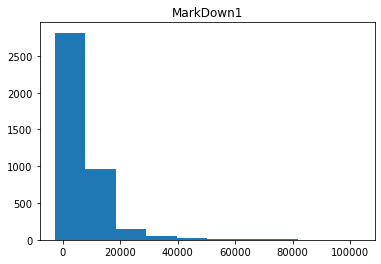

Valores unicos 2716 Promedio 3384.176593632328 Media 364.57


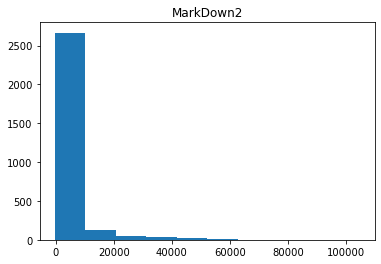

Valores unicos 2886 Promedio 1760.1001799058915 Media 36.26


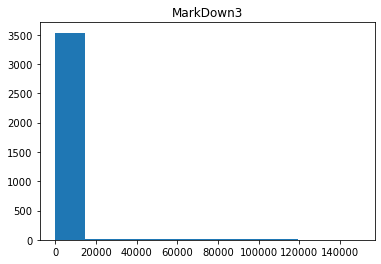

Valores unicos 3406 Promedio 3292.935886258671 Media 1176.425


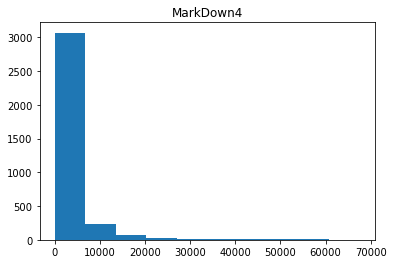

Valores unicos 4046 Promedio 4132.216422222234 Media 2727.135


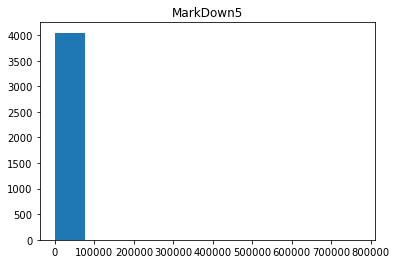

Valores unicos 2506 Promedio 172.46080918276078 Media 182.7640032


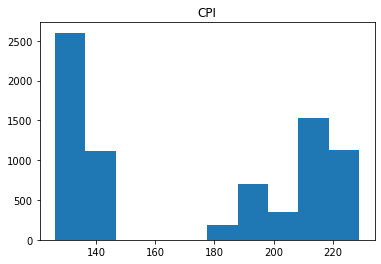

Valores unicos 405 Promedio 7.826821038790305 Media 7.806


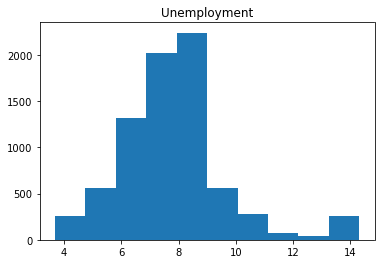

In [47]:
for i in range (len(columna)):
    print ("Valores unicos",len(df[columna[i]].unique()),"Promedio", df[columna[i]].mean(),"Media",df[columna[i]].median())
    plt.hist(df[columna[i]])
    plt.title(columna[i])
    plt.show();

### Reemplazo de valores nulos por la media

In [48]:
for i in range(len(columna)):
    df[columna[i]][df[columna[i]].isnull()==True]=df[columna[i]].median()
    

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_15052/940746113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna[i]][df[columna[i]].isnull()==True]=df[columna[i]].median()


### Verificación del procedimiento

In [53]:
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

### Revisión de los valores duplicados 

**Conclusión**  
No hay valores duplicados

In [57]:
print ("Actulamente tenemos", df.shape[0], "Eliminado los datos duplicados, se elimina el:",(df.shape[0]-df.drop_duplicates().shape[0])/df.shape[0],"%" )
df.drop_duplicates()

Actulamente tenemos 8190 Eliminado los datos duplicados, se elimina el: 0.0 %


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,4743.58,364.57,36.26,1176.425,2727.135,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,4743.58,364.57,36.26,1176.425,2727.135,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.970,3169.690,182.764003,7.806,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.470,1514.930,182.764003,7.806,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.840,2150.360,182.764003,7.806,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.000,1059.460,182.764003,7.806,False


### Tranformación de la columna a fecha y creación de nuevas columnas

In [70]:
df["Date"]=pd.to_datetime(df["Date"], format="%Y-%m-%d")
df["Año"]=df["Date"].apply(lambda x: x.year)
df["Mes"]=df["Date"].apply(lambda x: x.month)
df["Dia"]=df["Date"].apply(lambda x: x.day)
df.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Año,Mes,Dia
0,1,2010-02-05,42.31,2.572,4743.58,364.57,36.26,1176.425,2727.135,211.096358,8.106,False,2010,2,5
1,1,2010-02-12,38.51,2.548,4743.58,364.57,36.26,1176.425,2727.135,211.242170,8.106,True,2010,2,12
2,1,2010-02-19,39.93,2.514,4743.58,364.57,36.26,1176.425,2727.135,211.289143,8.106,False,2010,2,19


# Parte 3: Visualización

### Grafico de CPI por año

C:\Users\Cristofer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


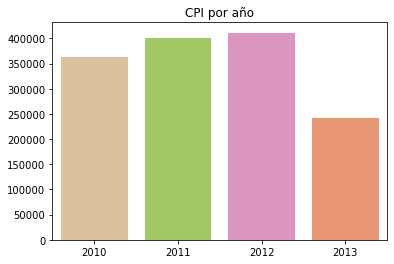

In [190]:
ano=list(pd.DataFrame(df.groupby("Año").sum()["CPI"]).index)
cpi=list(pd.DataFrame(df.groupby("Año").sum()["CPI"])["CPI"])
sbn.barplot(ano,cpi,palette="Set2_r");
plt.title("CPI por año")
plt.show();

### Grafico por mes

C:\Users\Cristofer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


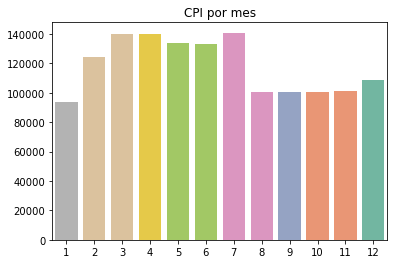

In [192]:
ano=list(pd.DataFrame(df.groupby("Mes").sum()["CPI"]).index)
cpi=list(pd.DataFrame(df.groupby("Mes").sum()["CPI"])["CPI"])
sbn.barplot(ano,cpi, palette="Set2_r");
plt.title("CPI por mes")
plt.show();

### Grafico por dia

C:\Users\Cristofer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


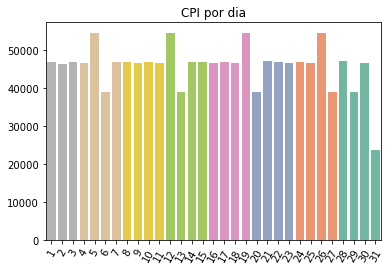

In [115]:
ano=list(pd.DataFrame(df.groupby("Dia").sum()["CPI"]).index)
cpi=list(pd.DataFrame(df.groupby("Dia").sum()["CPI"])["CPI"])
sbn.barplot(ano,cpi, palette="Set2_r");
plt.xticks(rotation=60);
plt.title("CPI por dia")
plt.show();

### CPI por año

In [251]:
df3=pd.DataFrame(df.groupby(["Date"])["CPI"].sum()).reset_index()
df3
nearest = alt.selection(type='single', nearest=True, on='mouseover',fields=["Date"], empty='none')

line = alt.Chart().mark_line().encode(alt.X("Date:T", axis=alt.Axis(title='fecha')),
    alt.Y('CPI:Q', axis=alt.Axis(title='CPI'), sort=alt.SortField(field="CPI",order='descending'), 
          scale=alt.Scale(domain=[7000, 9000])),  tooltip=["Date","CPI"] ) #La leyenda es SIMBOL

selectors = alt.Chart().mark_point().encode(x='Date:T',opacity=alt.value(0),).add_selection(nearest)

points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

text = line.mark_text(align='right', dx=5, dy=-25).encode(text=alt.condition(nearest, "CPI",alt.value(' '))
                                                         )

text1 = line.mark_text(align='right', dx=5, dy=-25).encode(text=alt.condition(nearest, "Date",alt.value(' '))
                                                         )

rules = alt.Chart().mark_rule(color='black').encode(x='Date:N',).transform_filter( nearest)

stockChart = alt.layer(line, selectors,points, rules, text,
                       data=df3, 
                       width=600, height=300,title='CPI por tiempo')
#stockChart.save("grafico.png")
stockChart

alt.LayerChart(...)

### Grafico del precio promedio del combustible por las 10 tienda mas alta

In [187]:
#data=data.reset_index()
data
multi= alt.selection_multi()
click = alt.selection_multi(encodings=['color'])
chart =alt.Chart(data).mark_point(color="red",size=120).encode(
    x=alt.X('Store:N'),
    y=alt.Y('Fuel_Price:Q', scale=alt.Scale(domain=[3.5, 3.8])),
   tooltip=["Store","Fuel_Price"],
).properties( selection=multi, width=500,height=300,title='Precio promedio de combustible por top10 tienda')
chart

alt.Chart(...)

### Grafico de relación entre el CPI y Precio combustible

C:\Users\Cristofer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


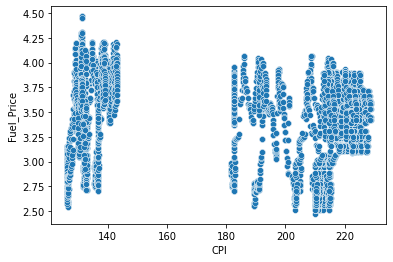

In [268]:

sbn.scatterplot(df["CPI"],df["Fuel_Price"]);
plt.annotate(df.corr()["CPI"].iloc[2],xy=(0.5,1),fontsize=110)
plt.show()

**Conclusión**  
No existe relación aparente

### Correlación

In [255]:
df.corr()["CPI"].iloc[2]

-0.17422705621551357

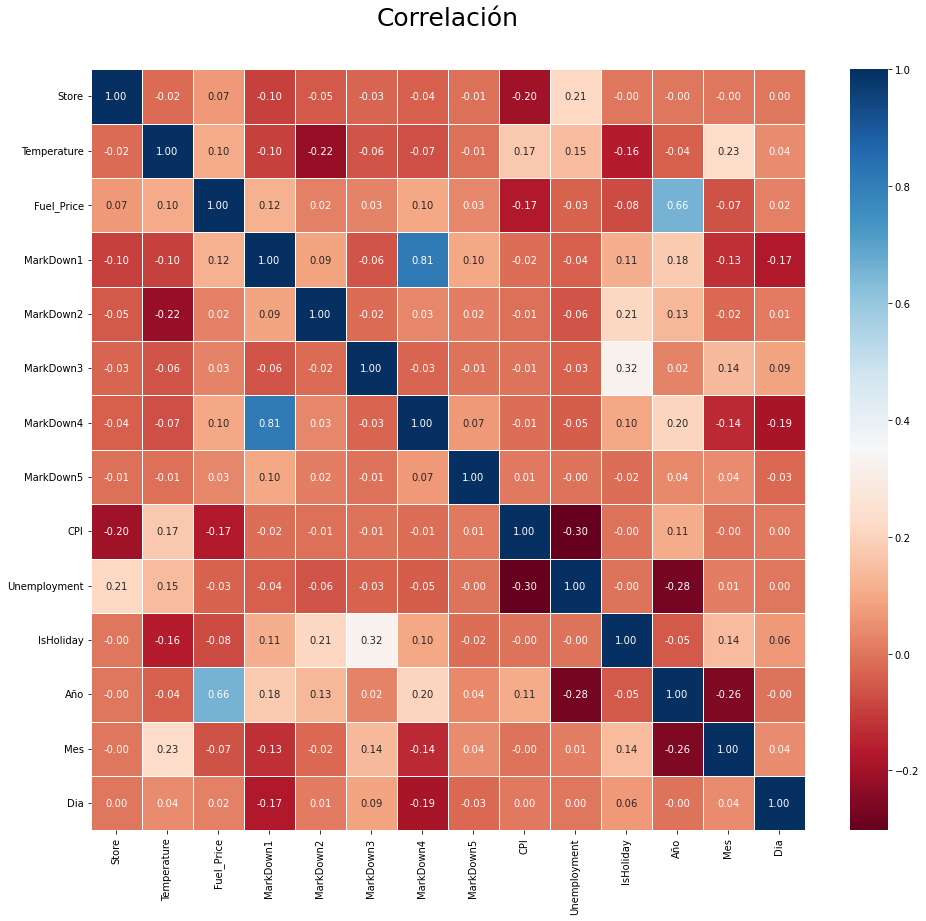

In [166]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Correlación', y=1.05, size=25,)
sbn.heatmap(df.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f')
plt.show()